In [1]:
import pandas as pd
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
# [Example] Read datasets
df = pd.read_csv("RestoInfo.csv")
import numpy as np


In [2]:
print(df.dtypes)

#check for duplicates
print(df.duplicated().sum)

#check for missing values
print(pd.DataFrame(round(df.isnull().sum()/df.shape[0] * 100, 3), columns=["Missing"]))

#renaming few columns
df.rename(columns= {"approx_cost(for two people)": "cost_of_two", "listed_in(type)":"service_type", "listed_in(city)": "serve_to"}, inplace=True)



Unnamed: 0                      int64
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object
<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      Fa

In [3]:
#Drop unwanted columns
df = df.drop(['Unnamed: 0'], axis=1)
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_of_two,reviews_list,menu_item,service_type,serve_to
0,Unique Brew Cafe Resto,No,No,NaN,0,Indiranagar,Quick Bites,NaN,Fast Food,200,[],[],Dine-out,Old Airport Road
1,Jayanthi Sagar,No,No,3.1 /5,21,Koramangala 5th Block,Quick Bites,NaN,"South Indian, North Indian, Chinese",200,"[('Rated 2.0', ""RATEDn Works only because it'...",[],Dine-out,Koramangala 4th Block
2,Rock Stone Ice Cream Factory,Yes,No,4.0/5,131,BTM,Dessert Parlor,"Icecream Cake, Brownie, Waffles, Chocolate Ice...",Ice Cream,230,"[('Rated 4.0', ""RATEDn Ice creams are really ...","['Midnight Indulgence Cake', 'Butterscotch Mel...",Delivery,Jayanagar
3,Punjabi by Nature 2.0,No,No,4.2 /5,3236,BTM,"Casual Dining, Microbrewery","Paneer Tikki, Mutton Raan, Mango Margarita, Cr...",North Indian,NaN,"[('Rated 3.0', ""RATEDn It has a beautiful amb...",[],Delivery,Koramangala 7th Block
4,Rayalaseema Chefs,Yes,Yes,3.9/5,225,Marathahalli,Casual Dining,"Bamboo Chicken, Butter Naan, Mutton Biryani, P...","North Indian, Biryani, Andhra, Chinese",800,"[('Rated 5.0', 'RATEDn Had Good experience wi...",[],Delivery,Brookefield
5,Bistro Oui,Yes,Yes,4.1 /5,402,Koramangala 5th Block,"Cafe, Bar","Veg Burger, Pork Ribs, Pizza, Chicken Sandwich...","Cafe, Continental, Salad, Steak","1,200","[('Rated 4.0', 'RATEDn Funny & TastynnWe visi...",[],Pubs and bars,Koramangala 5th Block
6,Bhavani Upahara,Yes,No,3.3/5,9,Bannerghatta Road,Quick Bites,NaN,South Indian,250,"[('Rated 5.0', 'RATEDn best north Karnataka f...",[],Delivery,BTM
7,Hotel Tom's Restaurant,Yes,Yes,4.4/5,712,Richmond Road,Casual Dining,"Appam, Sea Food, Fry Prawns, Dal Fry, Chicken ...","Mangalorean, Seafood, Chinese, North Indian","1,000","[('Rated 4.0', ""RATEDn Quite an old place to ...",[],Dine-out,Brigade Road
8,Munchies,Yes,No,3.9/5,64,Brigade Road,"Quick Bites, Bakery","Burgers, Sandwiches, Momos, Chicken Seekh Roll...","Fast Food, Bakery",250,"[('Rated 4.0', 'RATEDn I am glad i found this...","['Spicy Mixed Vegetable Club Sandwich', 'Chick...",Delivery,Brigade Road
9,Vinaya Coffee Moments,Yes,No,3.8/5,46,JP Nagar,Cafe,"Filter Coffee, Pizza, Pasta","Burger, Cafe, Desserts, Sandwich, Italian",450,"[('Rated 3.0', ""RATEDn This is great place fo...",[],Dine-out,Bannerghatta Road


In [4]:
#converting cost_of_two variable to integer
# for time being replace nan with 0
df.cost_of_two = df.cost_of_two.fillna(0)
df.cost_of_two = df.cost_of_two.astype(str).apply(lambda x: int(x.replace(',', '')))


In [5]:
df.cost_of_two = df.cost_of_two.astype('int')


In [6]:
#replace 0 with mean value
df.cost_of_two = df.cost_of_two.replace(0, df.cost_of_two.mean()).astype('int')

In [7]:
# Binning the cost_of_two column
df.cost_category = pd.cut(df.cost_of_two, 10) 

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


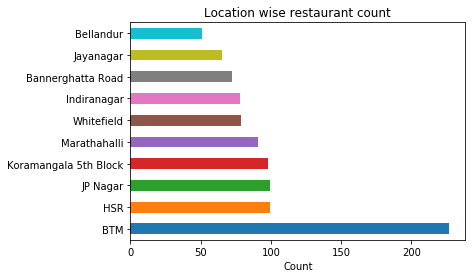

In [8]:
#analyse number of restaurants in location
df.location.value_counts().nlargest(10).plot(kind = "barh")
plt.rcParams['figure.figsize'] = 14,7
plt.title("Location wise restaurant count")
plt.xlabel("Count")
plt.show()

#Most of the reataurants are located at BTM which makes it most popular residential place and market place


In [9]:
# Removing unwanted columns from rate column
#df['rate'].replace('NEW', '0/0').value_counts()
df['rate'] = df['rate'].fillna('0/0')
df['rate_trimmed'] =  df['rate'].replace(['NEW', '-'], '0/0').apply(lambda x: x.split('/')[0]).apply(lambda x: x.split(" ")[0])
df['rate_trimmed'] = df['rate_trimmed'].astype('float')
df['rate_trimmed'] = df['rate_trimmed'].replace(0.0, df['rate_trimmed'].mean())


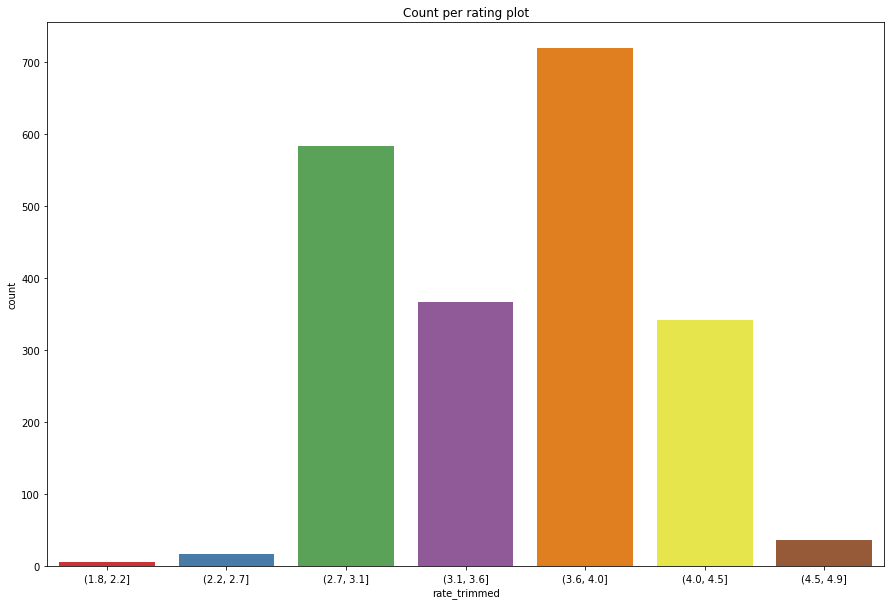

In [10]:
# Plot rating count

plt.rcParams['figure.figsize'] = 15,10
sns.countplot(pd.cut(df['rate_trimmed'], 7, precision=1), palette="Set1")
plt.title("Count per rating plot")
plt.show()

#Majority of ratings lie between 3.6- 4.0

In [11]:
# Transforming "book_table" column

df['book_table'] = np.where(df['book_table'] == 'Yes', 1, 0)
df['book_table'].value_counts()

0    1810
1     259
Name: book_table, dtype: int64

In [12]:
#Transforming "online_order" column
df['online_order'] = np.where(df['online_order'] == 'Yes', 1, 0)
df['online_order'].value_counts()

1    1221
0     848
Name: online_order, dtype: int64

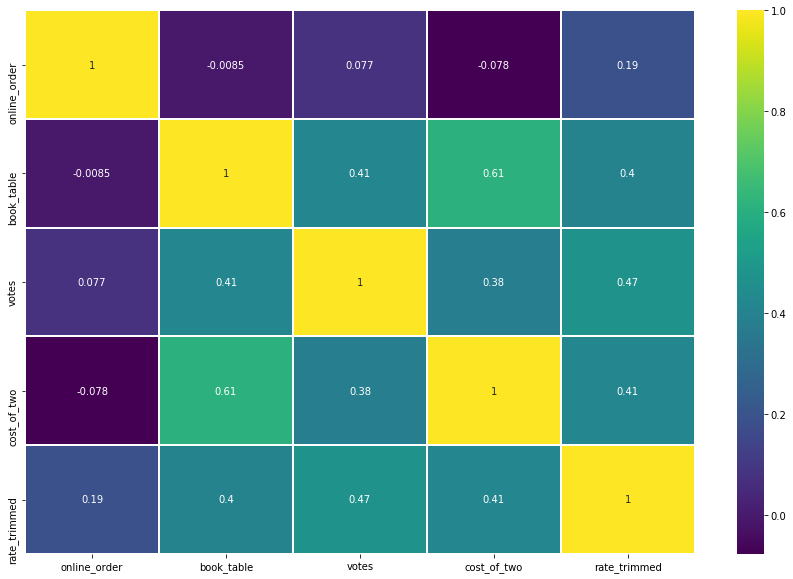

In [13]:
#Correlation matrix

sns.heatmap(df.corr(), annot=True, cmap= "viridis", linecolor='white', linewidths=1)
plt.show()

In [14]:
# Average cost of two has inverse relation with online booking
#Restaurants that provide table booking also, has less higher average cost of two ppl

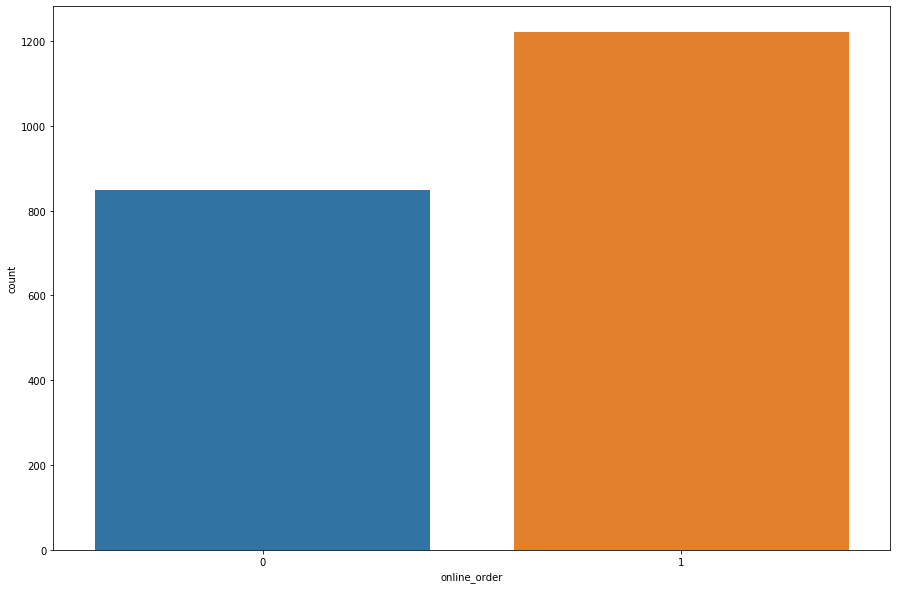

In [15]:
#Count how many restaurants provide online and dine
sns.countplot(df["online_order"])
plt.show()

In [16]:
# Appriximately 60% of restaurants provide online order

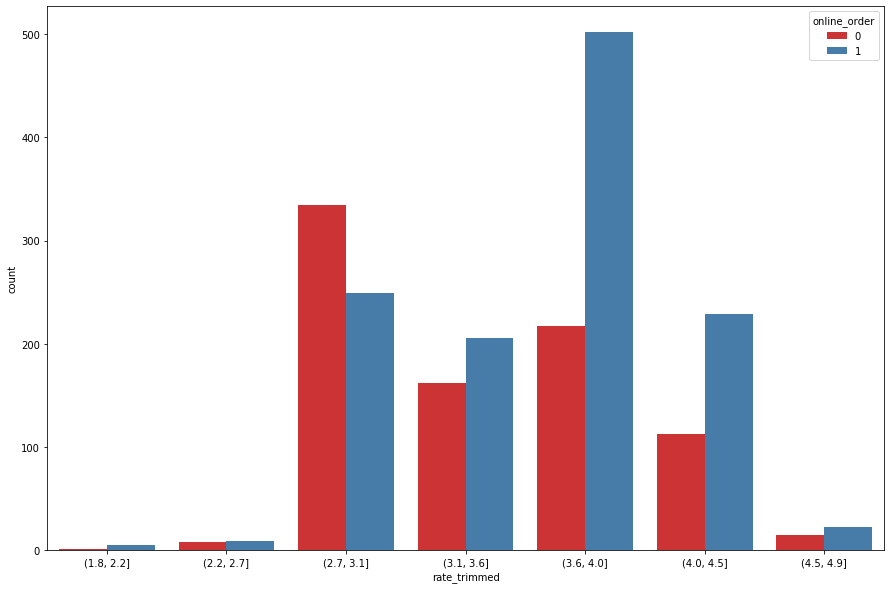

In [17]:
# Rating versus Online order and dine

sns.countplot(hue= df['online_order'], palette="Set1", x= pd.cut(df['rate_trimmed'], 7, precision=1))
plt.show()

In [18]:
#Rating is better for online order as people order online due to traffic issues and IT companies prefer order food online

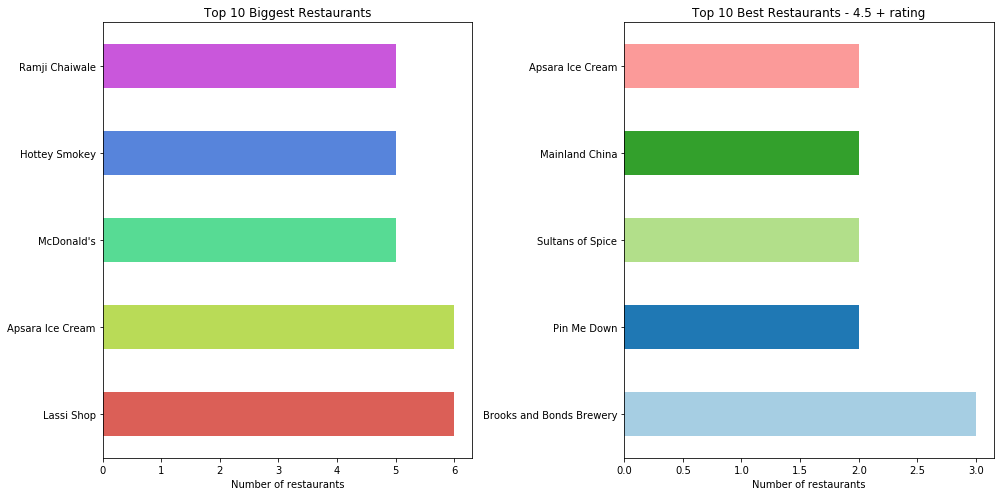

In [19]:
#top 10 best restaurants and top 10 biggest restaurants in Bangalore

plt.rcParams['figure.figsize'] = 14,7
plt.subplot(1,2,1)
df.name.value_counts().head().plot(kind="barh", color=sns.color_palette("hls", 5))
plt.xlabel("Number of restaurants")
plt.title("Top 10 Biggest Restaurants")

plt.subplot(1,2,2)
df[df.rate_trimmed >= 4.5]['name'].value_counts().nlargest(5).plot(kind="barh", color=sns.color_palette("Paired"))
plt.xlabel("Number of restaurants")
plt.title("Top 10 Best Restaurants - 4.5 + rating")
plt.tight_layout()